In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
wego = pd.read_csv("../data/Headway Data.csv")
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.columns = [x.lower() for x in wego.columns]

In [5]:
wego.head(5)

,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [7]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   calendar_id                350329 non-null  int64  
 1   service_abbr               350329 non-null  int64  
 2   adherence_id               350329 non-null  int64  
 3   date                       350329 non-null  object 
 4   route_abbr                 350329 non-null  int64  
 5   block_abbr                 350329 non-null  int64  
 6   operator                   350329 non-null  int64  
 7   trip_id                    350329 non-null  int64  
 8   overload_id                350329 non-null  int64  
 9   route_direction_name       350329 non-null  object 
 10  time_point_abbr            350329 non-null  object 
 11  route_stop_sequence        350318 non-null  float64
 12  trip_edge                  350329 non-null  int64  
 13  latitude                   35

In [8]:
#wego['adherence'].mean()

In [9]:
#wego['hdwy_dev'].mean()
print(wego.columns)

Index(['calendar_id', 'service_abbr', 'adherence_id', 'date', 'route_abbr',
       'block_abbr', 'operator', 'trip_id', 'overload_id',
       'route_direction_name', 'time_point_abbr', 'route_stop_sequence',
       'trip_edge', 'latitude', 'longitude', 'scheduled_time',
       'actual_arrival_time', 'actual_departure_time', 'adherence',
       'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev', 'adjusted_early_count',
       'adjusted_late_count', 'adjusted_ontime_count', 'stop_cancelled',
       'prev_sched_stop_cancelled', 'is_relief', 'dwell_in_mins',
       'scheduled_layover_minutes'],
      dtype='object')


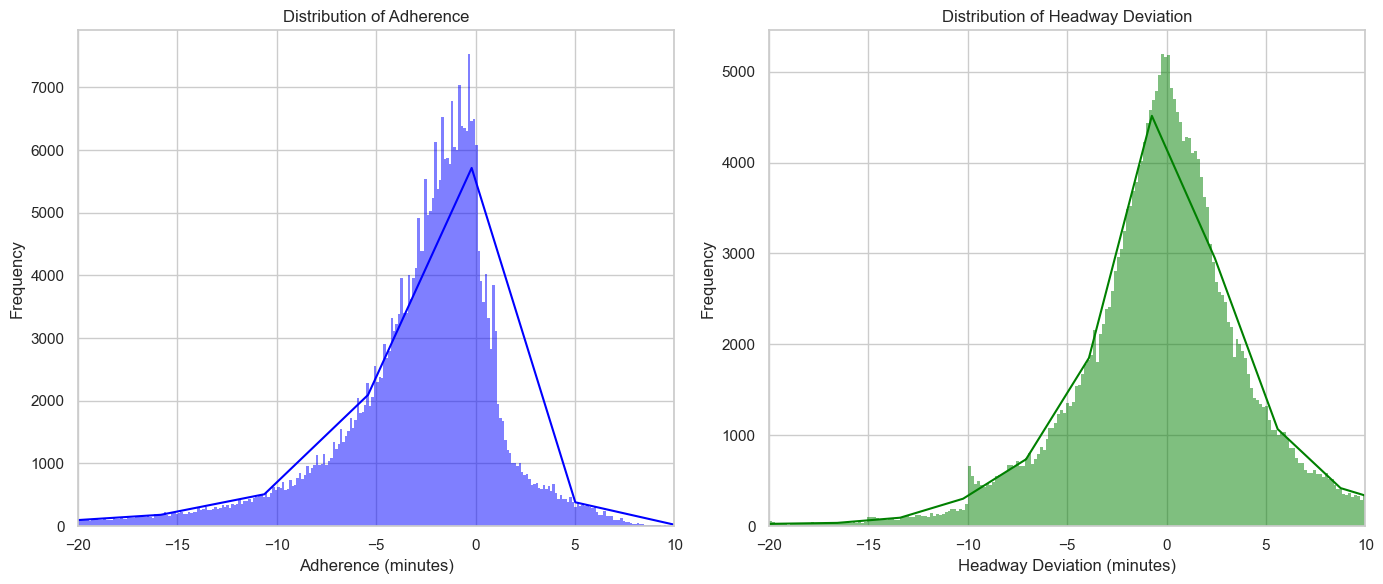

In [10]:
sns.set(style="whitegrid")

# Create a figure with two subplots: one for adherence, one for headway deviation
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot distribution for ADHERENCE
sns.histplot(wego['adherence'].dropna(), kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Adherence')
axes[0].set_xlabel('Adherence (minutes)')
axes[0].set_ylabel('Frequency')

# Plot distribution for HDWY_DEV
sns.histplot(wego['hdwy_dev'].dropna(), kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Headway Deviation')
axes[1].set_xlabel('Headway Deviation (minutes)')
axes[1].set_ylabel('Frequency')

# Set the x-axis limits to -10 and 10
axes[0].set_xlim(-20, 10)
axes[1].set_xlim(-20, 10)

# Show the plots
plt.tight_layout()
plt.show()

#

In [11]:
wego_dev = wego['hdwy_dev'].dropna()
wego_dev

7          2.666666
8          1.966666
9         -0.483334
11        -2.166667
12        -3.883334
            ...    
350320     6.716666
350323     4.916666
350324     5.266666
350326     1.866666
350327    17.500000
Name: hdwy_dev, Length: 265893, dtype: float64

In [12]:
deviation = wego_dev.sort_values(ascending=False)
deviation

269843    565.433333
270201    543.833333
187826    529.550000
53214     508.700000
326698    505.233333
             ...    
227443    -49.666667
227442    -50.316667
108940    -53.166667
108941    -55.533334
30822     -64.000000
Name: hdwy_dev, Length: 265893, dtype: float64

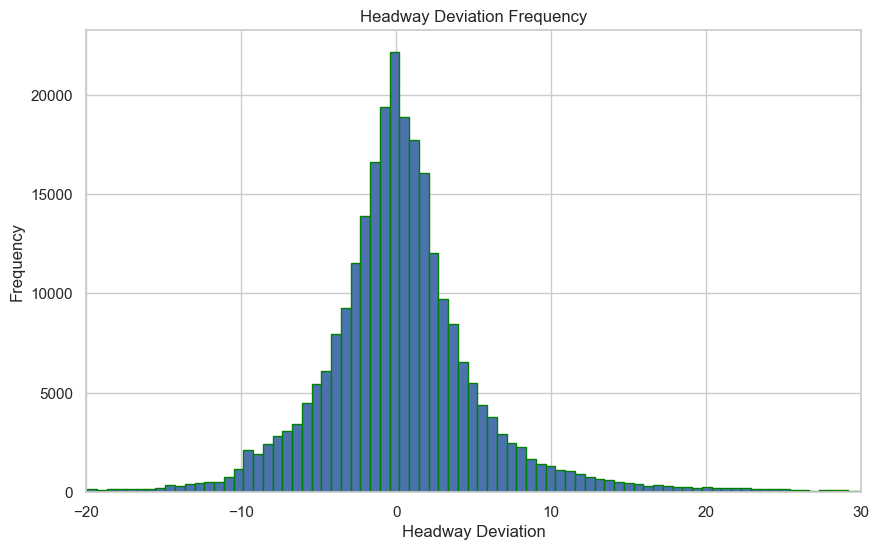

In [13]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(deviation, bins=1000, edgecolor='green') # Create the histogram
plt.xlim(-20, 30)

plt.title('Headway Deviation Frequency')  # Add a title
plt.xlabel('Headway Deviation')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Add grid lines for better readability

plt.show()  # Display the plot

In [15]:
wego.columns

Index(['calendar_id', 'service_abbr', 'adherence_id', 'date', 'route_abbr',
       'block_abbr', 'operator', 'trip_id', 'overload_id',
       'route_direction_name', 'time_point_abbr', 'route_stop_sequence',
       'trip_edge', 'latitude', 'longitude', 'scheduled_time',
       'actual_arrival_time', 'actual_departure_time', 'adherence',
       'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev', 'adjusted_early_count',
       'adjusted_late_count', 'adjusted_ontime_count', 'stop_cancelled',
       'prev_sched_stop_cancelled', 'is_relief', 'dwell_in_mins',
       'scheduled_layover_minutes'],
      dtype='object')

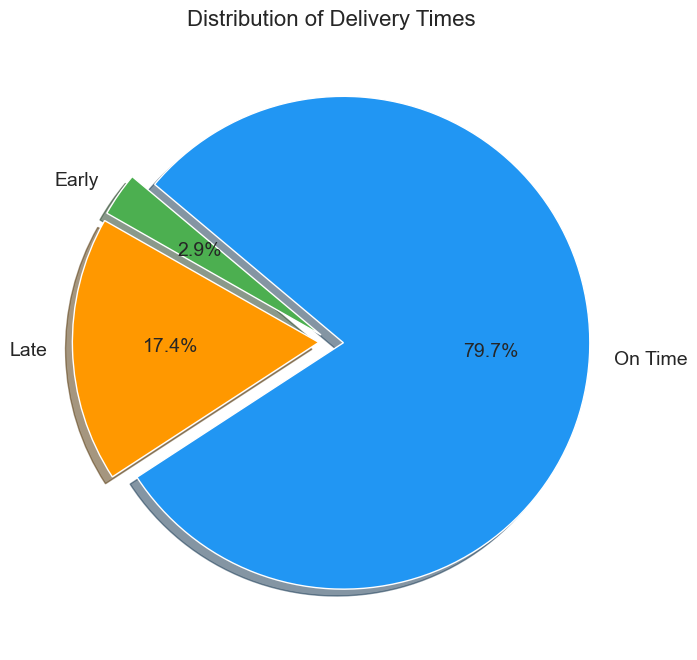

In [16]:
# total up all 3 of the adjusted early, late, and ontime columns
total_early = wego['adjusted_early_count'].sum()
total_late = wego['adjusted_late_count'].sum()
total_ontime = wego['adjusted_ontime_count'].sum()

# Calculate the total amount of trips made
total_trips = (total_early + total_late + total_ontime)

# Divide to get the total on-time percentage and round to two decimal places
ontime_percent = round((total_ontime/total_trips)*100, 2)
early_percent = round((total_early/total_trips)*100, 2)
late_percent = round((total_late/total_trips)*100, 2)

import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Early': early_percent,
    'Late': late_percent,
    'On Time': ontime_percent
}

# Convert data to a Pandas Series
data_series = pd.Series(data)

# Custom color palette for the pie chart
colors = ['#4CAF50', '#FF9800', '#2196F3']  

# Plotting the pie chart with enhanced visuals
plt.figure(figsize=(8, 8))  # Optional: Specify the size of the figure
plt.pie(data_series, 
        labels=data_series.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,    # Apply custom colors
        shadow=True,      # Add a shadow for better depth perception
        explode=(0.05, 0.05, 0.05),  # Slightly separate the slices
        textprops={'fontsize': 14})  # Increase font size of labels

plt.title('Distribution of Delivery Times', fontsize=16)

plt.show()


2. How does direction of travel, route, or location affect the headway and on-time performance?

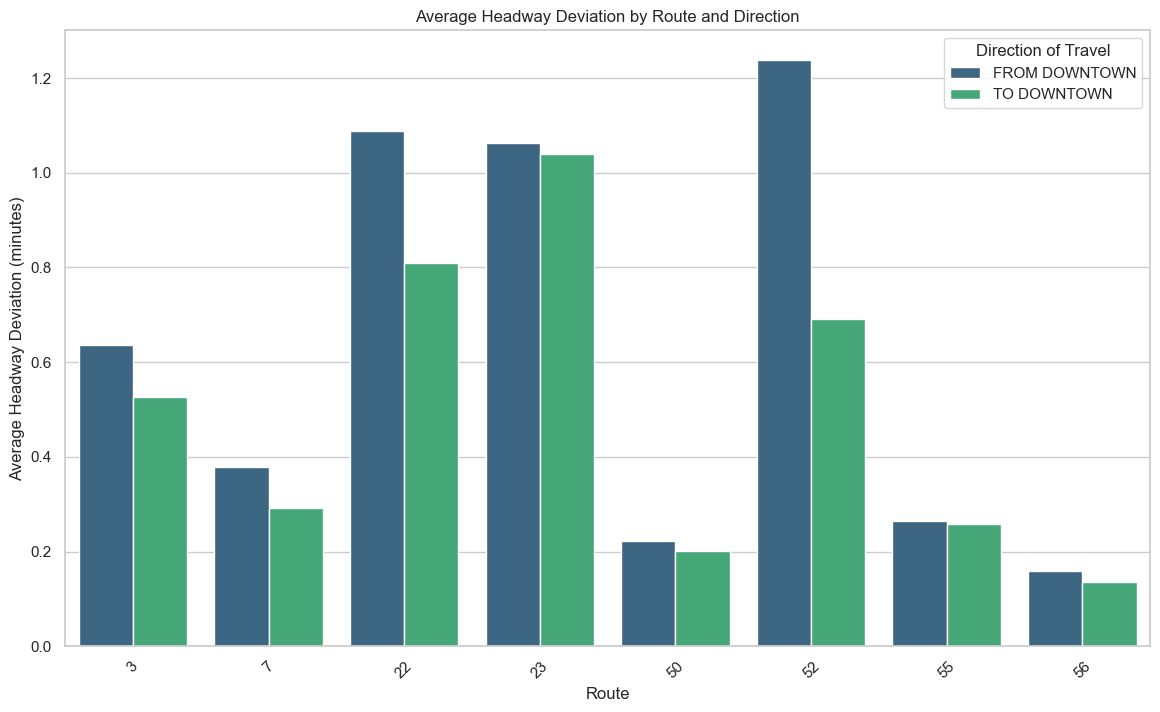

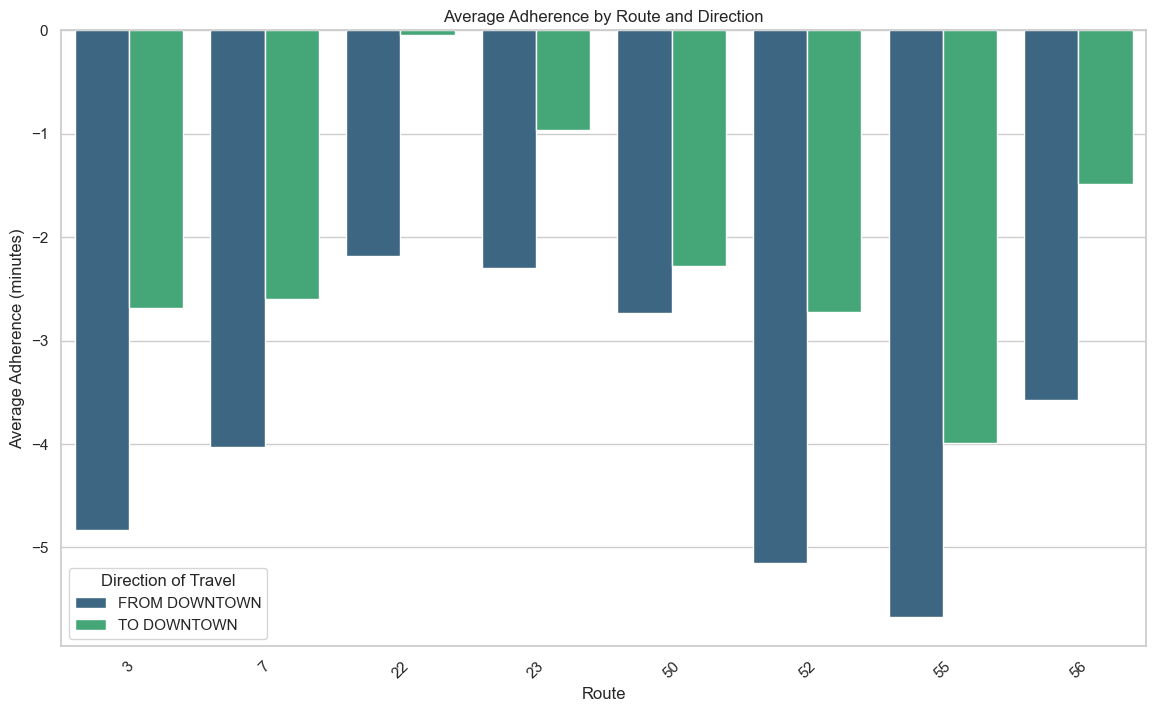

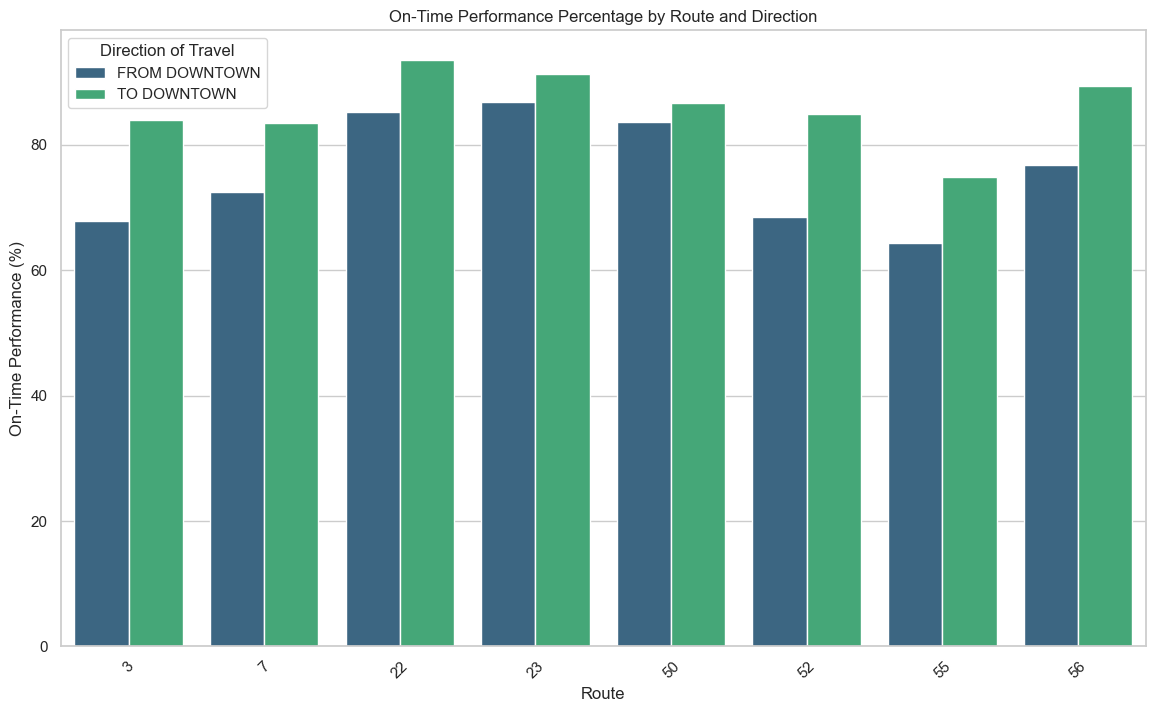

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate average headway deviation and on-time performance
route_v_dir_performance_df = wego.groupby(['route_abbr', 'route_direction_name']).agg({
    'hdwy_dev': 'mean',
    'adherence': 'mean',
    'adjusted_ontime_count': 'sum',
    'adjusted_late_count': 'sum',
    'adjusted_early_count': 'sum'
}).reset_index()
# Calculate on-time percentage for each combination of route and direction
route_v_dir_performance_df['on_time_percentage'] = (
    route_v_dir_performance_df['adjusted_ontime_count'] /
    (route_v_dir_performance_df['adjusted_ontime_count'] +
     route_v_dir_performance_df['adjusted_late_count'] +
     route_v_dir_performance_df['adjusted_early_count'])
) * 100
# Plot average headway deviation by route and direction
plt.figure(figsize=(14, 8))
sns.barplot(x='route_abbr', y='hdwy_dev', hue='route_direction_name', data=route_v_dir_performance_df, palette='viridis')
plt.title('Average Headway Deviation by Route and Direction')
plt.xlabel('Route')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()
# Plot average adherence by route and direction
plt.figure(figsize=(14, 8))
sns.barplot(x='route_abbr', y='adherence', hue='route_direction_name', data=route_v_dir_performance_df, palette='viridis')
plt.title('Average Adherence by Route and Direction')
plt.xlabel('Route')
plt.ylabel('Average Adherence (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()
# Plot on-time performance percentage by route and direction
plt.figure(figsize=(14, 8))
sns.barplot(x='route_abbr', y='on_time_percentage', hue='route_direction_name', data=route_v_dir_performance_df, palette='viridis')
plt.title('On-Time Performance Percentage by Route and Direction')
plt.xlabel('Route')
plt.ylabel('On-Time Performance (%)')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()

3. How does time of day or day of week affect headway and on-time performance?


4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.


5. Is there any relationship between lateness (ADHERENCE) and headway deviation?


In [56]:
# dropped all NaN values from hdwy_dev column
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [58]:
# filter out adherence and hdwy_dev values that seem to be outliers
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean = wego_clean[wego_clean['adherence'].between(-25, 10)]
wego_clean = wego_clean[wego_clean['hdwy_dev'].between(-20,40)]
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [60]:
# create a column that has the average adherence per route
adherence_mean_serie = wego_clean.groupby('route_abbr')['adherence'].mean()
wego_clean['mean_adherence'] = wego_clean['route_abbr'].map(adherence_mean_serie)
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569


In [62]:
# create a column that has the average headway deviation per route
headway_mean_serie = wego_clean.groupby('route_abbr')['hdwy_dev'].mean()
wego_clean['mean_hdwy_dev'] = wego_clean['route_abbr'].map(headway_mean_serie)
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence,mean_hdwy_dev
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569,0.395173
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569,0.395173
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569,0.395173


In [64]:
# creating a list of route names to title each plot
abbr_route = {1: 'Route 3',
             2: 'Route 7',
             3: 'Route 22',
             4: 'Route 23',
             5: 'Route 50',
             6: 'Route 52',
             7: 'Route 55',
             8: 'Route 56'}

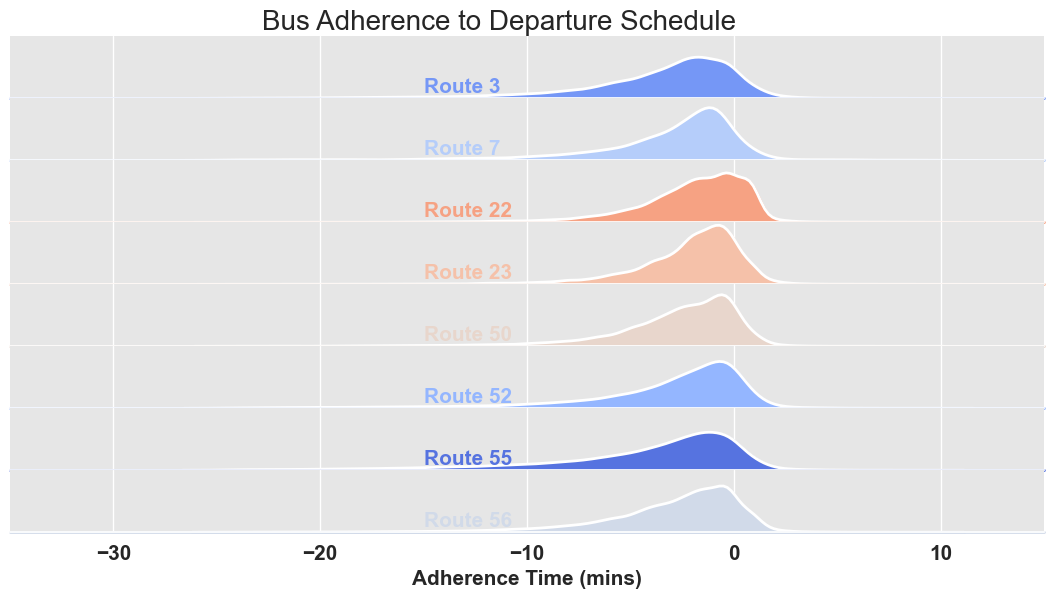

In [66]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(wego_clean, row='route_abbr', hue='mean_adherence', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'adherence',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'adherence', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set_xlim(-35, 15)
    ax.text(-15, 0.02, abbr_route[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=0.0)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Adherence Time (mins)', fontweight='bold', fontsize=15)
g.fig.suptitle('Bus Adherence to Departure Schedule',
               ha='center',
               fontsize=20,
               fontweight=20)

# plt.figure(figsize=(10, 10))
plt.show()

# g.savefig("ridgeline.png")

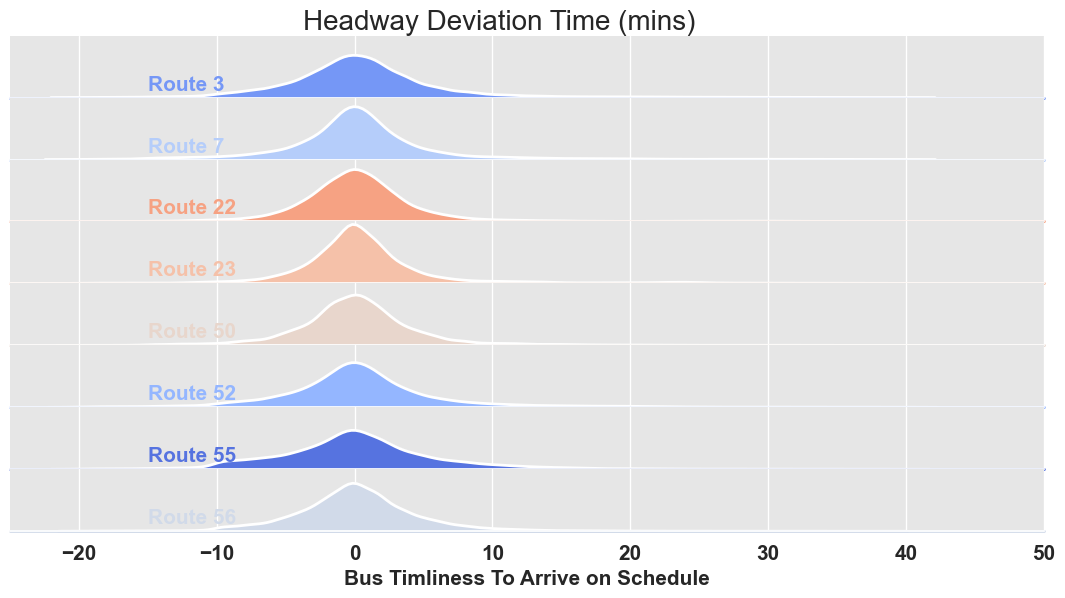

In [68]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(wego_clean, row='route_abbr', hue='mean_adherence', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'hdwy_dev',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'hdwy_dev', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set_xlim(-25, 50)
    ax.text(-15, 0.02, abbr_route[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=0.0)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Bus Timliness To Arrive on Schedule', fontweight='bold', fontsize=15)
g.fig.suptitle('Headway Deviation Time (mins)',
               ha='center',
               fontsize=20,
               fontweight=20)

# plt.figure(figsize=(10, 10))
plt.show()

# g.savefig("ridgeline.png")